In [1]:
seed = 42  # for reproducibility

import pickle
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["axes.grid"] = False
%matplotlib inline

import os
import sys
from pathlib import Path
import torch
import torch.nn.functional as F
from torchvision.utils import make_grid, save_image
from sklearn.metrics import plot_confusion_matrix
torch.manual_seed(seed)
sys.path.append(str(Path().absolute().parent))
plt.style.use('seaborn')

In [2]:
exp_path = Path().absolute().parent.parent.joinpath('src/experiments/0069_5centers_1epr30fr_BALANCED_AlexNetClassifier_Median_LateralityFixThenFlipAgain')
clog_path = 'experiments/0070_5centers_1epr30fr_BALANCED_AlexNetClassifier_Median_LateralityFixThenFlipAgainClient_Logs'
stge_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/stge')
jarv_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/jarv')
bcdr_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/bcdr')
inbreast_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/inbreast')
cmmd_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/cmmd')

In [3]:
pickle_file = 'log.pkl'
with open(exp_path.joinpath(pickle_file), 'rb') as handle:
    aggregated_metrics = pickle.load(handle)
    
with open(stge_path.joinpath(pickle_file), 'rb') as handle:
    stge_metrics = pickle.load(handle)
with open(jarv_path.joinpath(pickle_file), 'rb') as handle:
    jarv_metrics = pickle.load(handle)
    
with open(inbreast_path.joinpath(pickle_file), 'rb') as handle:
    inbreast_metrics = pickle.load(handle)
    
with open(bcdr_path.joinpath(pickle_file), 'rb') as handle:
    bcdr_metrics = pickle.load(handle)
    
with open(cmmd_path.joinpath(pickle_file), 'rb') as handle:
    cmmd_metrics = pickle.load(handle)

In [4]:
cmmd_metrics.keys()

dict_keys(['local_loss', 'GMLD_val_loss', 'LMLD_val_loss', 'local_accuracy', 'local_sensitivity', 'local_specificity', 'local_val_predictions', 'GMLD_accuracy', 'GMLD_true_positives', 'GMLD_false_positives', 'GMLD_false_negatives', 'GMLD_true_negatives', 'LMLD_train_accuracy', 'LMLD_val_accuracy', 'LMLD_train_true_positives', 'LMLD_train_false_positives', 'LMLD_train_false_negatives', 'LMLD_train_true_negatives', 'LMLD_val_true_positives', 'LMLD_val_false_positives', 'LMLD_val_false_negatives', 'LMLD_val_true_negatives'])

# Accuracies, 5 folds, 100 epochs. Average so that you get 1,100 np array (averaged across folds)

In [5]:
aggregated_metrics.keys()

dict_keys(['accuracies_aggregated', 'total_val_loss', 'time_spent'])

In [6]:
aggregated_metrics['accuracies_aggregated']

[0.4619045949761048,
 0.4619045949761048,
 0.4619045949761048,
 0.4619045949761048,
 0.4619045949761048,
 0.4619045949761048,
 0.4619045949761048,
 0.4619045949761048,
 0.4619045949761048,
 0.4619045949761048,
 0.4619045949761048,
 0.4619045949761048,
 0.4619045949761048,
 0.4619045949761048,
 0.4619045949761048,
 0.4619045949761048,
 0.4619045949761048,
 0.46190459497610475,
 0.4619045949761048,
 0.4619045949761048,
 0.4619045949761048,
 0.4619045949761048,
 0.4619045949761048,
 0.4619045949761048,
 0.4619045949761048,
 0.4619045949761048,
 0.4619045949761048,
 0.4619045949761048,
 0.4619045949761048,
 0.4619045949761048]

In [7]:
inbreast_metrics['local_loss']

{0: [50.0],
 1: [50.0],
 2: [50.0],
 3: [50.0],
 4: [50.0],
 5: [50.0],
 6: [50.0],
 7: [50.0],
 8: [50.0],
 9: [50.0],
 10: [50.0],
 11: [50.0],
 12: [50.0],
 13: [50.0],
 14: [50.0],
 15: [50.0],
 16: [50.0],
 17: [50.0],
 18: [50.0],
 19: [50.0],
 20: [50.0],
 21: [50.0],
 22: [50.0],
 23: [50.0],
 24: [50.0],
 25: [50.0],
 26: [50.0],
 27: [50.0],
 28: [50.0],
 29: [50.0],
 30: []}

## Curve

In [8]:
[cmmd_metrics['local_loss'][i][0] for i in range(len(cmmd_metrics['local_loss'])-1)]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [9]:
cmmd_losses_local = np.array([cmmd_metrics['local_loss'][i][0] for i in range(len(cmmd_metrics['local_loss'])-1)])
inbreast_losses_local = np.array([inbreast_metrics['local_loss'][i][0] for i in range(len(inbreast_metrics['local_loss'])-1)])
stge_losses_local = np.array([stge_metrics['local_loss'][i][0] for i in range(len(stge_metrics['local_loss'])-1)])
jarv_losses_local = np.array([jarv_metrics['local_loss'][i][0] for i in range(len(jarv_metrics['local_loss'])-1)])
bcdr_losses_local = np.array([bcdr_metrics['local_loss'][i][0] for i in range(len(bcdr_metrics['local_loss'])-1)])
steps = range(len(cmmd_losses_local))

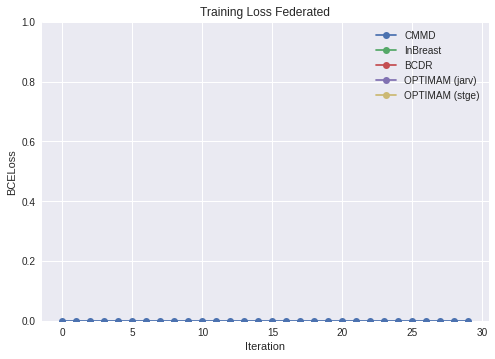

In [10]:
plt.plot(steps, cmmd_losses_local,'-o', label='CMMD')
plt.plot(steps, inbreast_losses_local,'-o', label='InBreast')
plt.plot(steps, bcdr_losses_local,'-o', label='BCDR')
plt.plot(steps, jarv_losses_local,'-o', label='OPTIMAM (jarv)')
plt.plot(steps, stge_losses_local,'-o', label='OPTIMAM (stge)')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0,1)
plt.ylabel('BCELoss')
plt.title('Training Loss Federated')
plt.savefig('./plots/train_loss_per_center_30EPR1FR_MEDIAN.png')

In [11]:
for i in range(len(cmmd_metrics['local_val_loss'])-1):
    print(i)

KeyError: 'local_val_loss'

In [ ]:
[cmmd_metrics['local_val_loss'][i] for i in range(len(cmmd_metrics['local_val_loss'])-1)]

In [ ]:
cmmd_losses_local = np.array([cmmd_metrics['local_val_loss'][i] for i in range(len(cmmd_metrics['local_val_loss'])-1)])
inbreast_losses_local = np.array([inbreast_metrics['local_val_loss'][i] for i in range(len(inbreast_metrics['local_val_loss'])-1)])
stge_losses_local = np.array([stge_metrics['local_val_loss'][i] for i in range(len(stge_metrics['local_val_loss'])-1)])
jarv_losses_local = np.array([jarv_metrics['local_val_loss'][i] for i in range(len(jarv_metrics['local_val_loss'])-1)])
bcdr_losses_local = np.array([bcdr_metrics['local_val_loss'][i] for i in range(len(bcdr_metrics['local_val_loss'])-1)])
steps = range(len(cmmd_losses_local))

In [ ]:
plt.plot(steps, cmmd_losses_local,'-o', label='CMMD')
plt.plot(steps, inbreast_losses_local,'-o', label='InBreast')
plt.plot(steps, bcdr_losses_local,'-o', label='BCDR')
plt.plot(steps, jarv_losses_local,'-o', label='OPTIMAM (jarv)')
plt.plot(steps, stge_losses_local,'-o', label='OPTIMAM (stge)')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0,1)
plt.ylabel('BCELoss')
plt.title('Validation Loss Federated')
plt.savefig('./plots/val_loss_per_center_30EPR1FR_MEDIAN_Laterality.png')

In [ ]:
plt.plot(steps, aggregated_metrics,'-o', label='aggregated')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0,1)
plt.ylabel('BCELoss')
plt.title('Training Each Center Isolation')
plt.savefig('./plots/sanity_check_success1EPR30FR.png')

In [12]:
cmmd_accuracy = [cmmd_metrics['GMLD_true_positives'][i] / (cmmd_metrics['GMLD_true_positives'][i] + cmmd_metrics['GMLD_false_negatives'][i]) for i in range(len(cmmd_metrics['GMLD_true_positives']))]
cmmd_sensitivity = [cmmd_metrics['GMLD_true_positives'][i] / (cmmd_metrics['GMLD_true_positives'][i] + cmmd_metrics['GMLD_false_negatives'][i]) for i in range(len(cmmd_metrics['GMLD_true_positives']))]
cmmd_specificity = [cmmd_metrics['GMLD_true_negatives'][i] / (cmmd_metrics['GMLD_true_negatives'][i] + cmmd_metrics['GMLD_false_positives'][i]) for i in range(len(cmmd_metrics['GMLD_true_negatives']))]
cmmd_f1 = [2 * cmmd_metrics['GMLD_true_positives'][i] / (2 * cmmd_metrics['GMLD_true_positives'][i] + cmmd_metrics['GMLD_false_positives'][i] + cmmd_metrics['GMLD_false_negatives'][i]) for i in range(len(cmmd_metrics['GMLD_true_positives']))]
# cmmd_AUC = [sklearn.metrics.roc_auc_score(cmmd_metrics['GMLD_labels'][i].detach().numpy(), cmmd_metrics['GMLD_predictions'][i].detach().numpy()) for i in range(len(cmmd_metrics['GMLD_true_positives']))]


In [13]:
stge_f1 = [2 * stge_metrics['GMLD_true_positives'][i] / (2 * stge_metrics['GMLD_true_positives'][i] + stge_metrics['GMLD_false_positives'][i] + stge_metrics['GMLD_false_negatives'][i]) for i in range(len(stge_metrics['GMLD_true_positives']))]
jarv_f1 = [2 * jarv_metrics['GMLD_true_positives'][i] / (2 * jarv_metrics['GMLD_true_positives'][i] + jarv_metrics['GMLD_false_positives'][i] + jarv_metrics['GMLD_false_negatives'][i]) for i in range(len(jarv_metrics['GMLD_true_positives']))]
bcdr_f1 = [2 * bcdr_metrics['GMLD_true_positives'][i] / (2 * bcdr_metrics['GMLD_true_positives'][i] + bcdr_metrics['GMLD_false_positives'][i] + bcdr_metrics['GMLD_false_negatives'][i]) for i in range(len(jarv_metrics['GMLD_true_positives']))]
inbreast_f1 = [2 * inbreast_metrics['GMLD_true_positives'][i] / (2 * inbreast_metrics['GMLD_true_positives'][i] + inbreast_metrics['GMLD_false_positives'][i] + inbreast_metrics['GMLD_false_negatives'][i]) for i in range(len(jarv_metrics['GMLD_true_positives']))]

In [14]:
all_true_positives = inbreast_metrics['GMLD_true_positives'][-1] + stge_metrics['GMLD_true_positives'][-1] + jarv_metrics['GMLD_true_positives'][-1] + bcdr_metrics['GMLD_true_positives'][-1] + cmmd_metrics['GMLD_true_positives'][-1]
all_false_positives = inbreast_metrics['GMLD_false_positives'][-1] + stge_metrics['GMLD_false_positives'][-1] + jarv_metrics['GMLD_false_positives'][-1] + bcdr_metrics['GMLD_false_positives'][-1] + cmmd_metrics['GMLD_false_positives'][-1]
all_false_negatives = inbreast_metrics['GMLD_false_negatives'][-1] + stge_metrics['GMLD_false_negatives'][-1] + jarv_metrics['GMLD_false_negatives'][-1] + bcdr_metrics['GMLD_false_negatives'][-1] + cmmd_metrics['GMLD_false_negatives'][-1]
all_f1 = 2 * all_true_positives / (2 * all_true_positives + all_false_positives + all_false_negatives)

In [ ]:
plt.plot(steps, jarv_f1,'-o', label='jarv')
plt.plot(steps, stge_f1,'-o', label='stge')
plt.plot(steps, bcdr_f1,'-o', label='bcdr')
plt.plot(steps, inbreast_f1,'-o', label='inbreast')
plt.plot(steps, cmmd_f1,'-o', label='cmmd')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0.2,1)
plt.ylabel('F1 Score')
plt.title('Federated Median F1 Score per Center')
plt.savefig('./plots/FMedian_F1_LateralityFlipAgainDense.png')

In [15]:
print(inbreast_f1[-1], cmmd_f1[-1], jarv_f1[-1], stge_f1[-1], bcdr_f1[-1], all_f1) 

0.5454545454545454 0.672645739910314 0.6671968190854871 0.6654193950732772 0.6 0.665232093452198


In [ ]:
all_true_positives = inbreast_metrics['GMLD_true_positives'][-1] + bcdr_metrics['GMLD_true_positives'][-1] + cmmd_metrics['GMLD_true_positives'][-1]
all_false_positives = inbreast_metrics['GMLD_false_positives'][-1] + bcdr_metrics['GMLD_false_positives'][-1] + cmmd_metrics['GMLD_false_positives'][-1]
all_false_negatives = inbreast_metrics['GMLD_false_negatives'][-1] + bcdr_metrics['GMLD_false_negatives'][-1] + cmmd_metrics['GMLD_false_negatives'][-1]
no_optimam_f1 = 2 * all_true_positives / (2 * all_true_positives + all_false_positives + all_false_negatives)

In [ ]:
no_optimam_f1

In [ ]:
inbreast_accuracy = [inbreast_metrics['GMLD_true_positives'][i] / (inbreast_metrics['GMLD_true_positives'][i] + inbreast_metrics['GMLD_false_negatives'][i]) for i in range(len(inbreast_metrics['GMLD_true_positives']))]


In [ ]:
cmmd_accuracy